In [5]:
import pandas as pd
import numpy as np
import os
import pickle
import tensorflow as tf
import tensorflow.keras as keras
from urllib.parse import urlparse
import tldextract
from tld import get_tld, is_tld

import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split

In [1]:
from tensorflow.keras.layers import  Embedding, Flatten, Dense,Dropout, Lambda
from tensorflow.keras.models import  Sequential

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
!pip install tld

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 3.3 MB/s eta 0:00:00


In [4]:
!pip install tldextract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 3.2 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
big_data=pd.read_csv('/content/drive/MyDrive/dataset/BIG_DATA.csv')
big_data.head(10)

,Unnamed: 0,url,type_name,type,url_len,domain,@,?,-,=,...,!,*,",",//,abnormal_url,https,digits,letters,shortening_service,contain_ip_address
0,0,http://www.zselicpaintball.hu/index.html,DefacementSitesURLFiltered,1,40,www.zselicpaintball.hu,0,0,0,0,...,0,0,0,1,1,0,0,33,0,0
1,1,http://sohacogroup.com.vn/index.php?option=com...,DefacementSitesURLFiltered,1,100,sohacogroup.com.vn,0,1,0,4,...,0,0,0,1,1,0,5,77,0,0
2,2,http://indianexpress.com/article/cities/mumbai...,Benign_list_big_final,0,116,indianexpress.com,0,0,9,0,...,0,0,0,1,1,0,0,98,0,0
3,3,http://www.easy-process.de/de/eigenes-wissensm...,DefacementSitesURLFiltered,1,60,www.easy-process.de,0,0,2,0,...,0,0,0,1,1,0,0,50,0,0
4,4,http://mic.com/articles/105628/10-uplifting-ph...,Benign_list_big_final,0,99,mic.com,0,0,12,0,...,0,0,0,1,1,0,12,68,0,0
5,5,http://www.marrrceloandrade.com.br/index.php?o...,DefacementSitesURLFiltered,1,183,www.marrrceloandrade.com.br,0,1,10,5,...,0,0,0,1,1,0,6,146,0,0
6,6,http://www.corpussportcenter.it/includes/index...,phishing_dataset,3,51,www.corpussportcenter.it,0,0,0,0,...,0,0,0,1,1,0,0,43,0,0
7,7,http://www.mariolas.gr/sejeal.jpg,DefacementSitesURLFiltered,1,33,www.mariolas.gr,0,0,0,0,...,0,0,0,1,1,0,0,26,0,0
8,8,http://www.aiavicenza.it/index.php?option=com_...,DefacementSitesURLFiltered,1,160,www.aiavicenza.it,0,1,9,4,...,0,0,0,1,1,0,4,129,0,0
9,9,http://mixi.jp/share.pl?u=http://alfalfalfa.co...,Benign_list_big_final,0,111,mixi.jp,0,1,0,2,...,0,0,0,2,1,0,31,63,0,0


In [8]:

y_train=big_data['type']

In [ ]:
urls_corpus=big_data.loc[:,'url']

In [ ]:
urls_corpus=urls_corpus.to_frame('url')
urls_corpus.head(1)

,url
0,http://www.zselicpaintball.hu/index.html


In [ ]:
tokenizer=Tokenizer(oov_token='<OOV>',char_level=True)
tokenizer.fit_on_texts(urls_corpus['url'])
word_index=tokenizer.word_index
word_index

{'<OOV>': 1,
 't': 2,
 'e': 3,
 'o': 4,
 'i': 5,
 'a': 6,
 '/': 7,
 'n': 8,
 'p': 9,
 'c': 10,
 'r': 11,
 'd': 12,
 's': 13,
 'h': 14,
 'l': 15,
 'm': 16,
 '.': 17,
 '-': 18,
 'w': 19,
 '%': 20,
 '=': 21,
 'b': 22,
 'u': 23,
 'g': 24,
 '1': 25,
 '&': 26,
 '0': 27,
 ':': 28,
 '2': 29,
 'f': 30,
 '8': 31,
 'v': 32,
 'k': 33,
 '9': 34,
 '3': 35,
 'y': 36,
 '5': 37,
 '4': 38,
 'x': 39,
 '7': 40,
 '6': 41,
 '_': 42,
 '?': 43,
 'z': 44,
 'j': 45,
 'q': 46,
 '+': 47,
 'ะ': 48,
 '\\': 49,
 ';': 50,
 ',': 51,
 '[': 52,
 ']': 53,
 'พ': 54,
 'ต': 55,
 'ฝ': 56,
 '*': 57,
 'ธ': 58,
 'ฐ': 59,
 'ร': 60,
 '~': 61,
 "'": 62,
 ')': 63,
 '(': 64,
 'ผ': 65,
 '@': 66,
 'บ': 67,
 '|': 68,
 'ฒ': 69,
 'ฑ': 70,
 'ณ': 71,
 'ฟ': 72,
 'ป': 73,
 'ฮ': 74,
 'น': 75,
 'ฃ': 76,
 'ด': 77,
 'ก': 78,
 'เ': 79,
 '!': 80,
 'ย': 81,
 'ท': 82,
 'ถ': 83,
 'ฉ': 84,
 'ญ': 85,
 'า': 86,
 'ง': 87,
 'ค': 88,
 '#': 89,
 'ล': 90,
 '\xa0': 91,
 'ช': 92,
 'ฦ': 93,
 ' ': 94,
 'ฅ': 95,
 'จ': 96,
 '$': 97,
 'ห': 98,
 'ซ': 99,
 'ข': 100,


In [9]:
# with open('/content/drive/MyDrive/dataset/tokenizer_char_urls.pkl','wb') as handle:
#   pickle.dump(tokenizer,handle)
with open('/content/drive/MyDrive/dataset/tokenizer_char_urls.pkl','rb') as handle:
  tokenizer=pickle.load(handle)

In [ ]:
len_dictionary=len(word_index)
print(len_dictionary)

134


In [10]:
len_dictionary=134

In [ ]:
token=tokenizer.texts_to_sequences(urls_corpus['url'])

In [ ]:
maxlen=0
for t in token:
  if len(t)>maxlen:
    maxlen=len(t)
print(maxlen)

2081


In [11]:
maxlen=2048

In [ ]:
token = pad_sequences(token, maxlen=maxlen, padding='post',truncating='post')

In [ ]:
token.shape

(165366, 2048)

In [12]:
embedding_dims=64

In [ ]:
model=Sequential()
model.add(Embedding(len_dictionary,embedding_dims,input_length=maxlen))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2048, 64)          8576      
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                4194336   
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4203077 (16.03 MB)
Trainable params: 4203077 (16.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(token, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train.shape,X_test.shape

((132292, 2048), (33074, 2048))

In [ ]:
earlystopping = keras.callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience =3,
                                        restore_best_weights = True)

In [ ]:
model.fit(X_train,y_train,epochs=40,validation_split=0.2,verbose=1,callbacks=[earlystopping])

Epoch 1/40
3308/3308 [==============================] - 23s 7ms/step - loss: 0.1857 - accuracy: 0.9421 - val_loss: 0.0865 - val_accuracy: 0.9726
Epoch 2/40
3308/3308 [==============================] - 18s 5ms/step - loss: 0.0703 - accuracy: 0.9780 - val_loss: 0.0733 - val_accuracy: 0.9777
Epoch 3/40
3308/3308 [==============================] - 19s 6ms/step - loss: 0.0492 - accuracy: 0.9845 - val_loss: 0.0749 - val_accuracy: 0.9776
Epoch 4/40
3308/3308 [==============================] - 18s 6ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0693 - val_accuracy: 0.9812
Epoch 5/40
3308/3308 [==============================] - 18s 6ms/step - loss: 0.0293 - accuracy: 0.9907 - val_loss: 0.0811 - val_accuracy: 0.9796
Epoch 6/40
3308/3308 [==============================] - 19s 6ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.0780 - val_accuracy: 0.9814
Epoch 7/40
3308/3308 [==============================] - 19s 6ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0934 - val_ac

In [ ]:
model.save('/content/drive/MyDrive/dataset/model_embedding_char.keras')

In [ ]:
model.evaluate(X_test,y_test)

1034/1034 [==============================] - 3s 2ms/step - loss: 0.0671 - accuracy: 0.9813


[0.0670771449804306, 0.9813145995140076]

In [13]:
model=keras.models.load_model('/content/drive/MyDrive/dataset/model_embedding_char.keras')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 2048, 64)          8576      
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 32)                4194336   
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4203077 (16.03 MB)
Trainable params: 4203077 (16.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
link= ['https://www.youtube.com','https://www.kaggle.com/code/fahaddalwai/detecting-malicious-url-using-neural-network','https://study4.com/tests/?term=ETS']
link=pd.DataFrame(link,columns=['url'])
link

,url
0,https://www.youtube.com
1,https://www.kaggle.com/code/fahaddalwai/detect...
2,https://study4.com/tests/?term=ETS


In [ ]:
link= tokenizer.texts_to_sequences(link['url'])
link= pad_sequences(link, maxlen=maxlen, padding='post',truncating='post')


In [ ]:
y_pred=model.predict(link)
y_pred

1/1 [==============================] - 0s 82ms/step


array([[6.7129107e-09, 6.2927163e-01, 2.0058929e-04, 3.7050453e-01,
        2.3244043e-05],
       [1.4761828e-04, 6.8124461e-01, 3.1839803e-01, 2.0964027e-04,
        2.2027508e-10],
       [6.0361093e-01, 1.1750180e-04, 3.8430260e-03, 3.9242855e-01,
        7.0510014e-10]], dtype=float32)

In [ ]:
print(np.argmax(y_pred,axis=1))

[1 1 0]


Mô hình chưa hiệu quả, tiến hành rút trích lớp embedding

In [14]:
embedding_layer=model.get_layer('embedding_1')
embedding_matrix=embedding_layer.weights[0].numpy()

In [ ]:
embedding_matrix

array([[-0.00074117, -0.00400617, -0.00135118, ..., -0.00166468,
         0.00219325,  0.00135812],
       [ 0.00101312,  0.00902834, -0.0103726 , ...,  0.01077026,
        -0.02384722,  0.04839099],
       [-0.05746467,  0.03189003, -0.1548012 , ..., -0.01640708,
         0.14477685, -0.09553402],
       ...,
       [-0.01333108, -0.14366283, -0.06413432, ..., -0.06427877,
         0.09851846, -0.04028365],
       [ 0.09090307, -0.07228148, -0.06117677, ...,  0.02615214,
        -0.06053692, -0.06122841],
       [ 0.04679712, -0.06858652, -0.11058623, ...,  0.00993648,
        -0.12624373, -0.12469198]], dtype=float32)

In [15]:
model=Sequential()

In [16]:
from keras.layers import GlobalAveragePooling1D

In [17]:
model.add(Embedding(len_dictionary,embedding_dims,input_length=maxlen,weights=[embedding_matrix]))

model.add(GlobalAveragePooling1D())

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2048, 64)          8576      
                                                                 
 global_average_pooling1d (  (None, 64)                0         
 GlobalAveragePooling1D)                                         
                                                                 
Total params: 8576 (33.50 KB)
Trainable params: 8576 (33.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.save('/content/drive/MyDrive/dataset/feature_character.keras')

In [19]:
slice_data=big_data.loc[:,'url']
slice_data=slice_data.to_frame(name='url')

In [ ]:
slice_data

,url
0,http://www.zselicpaintball.hu/index.html
1,http://sohacogroup.com.vn/index.php?option=com...
2,http://indianexpress.com/article/cities/mumbai...
3,http://www.easy-process.de/de/eigenes-wissensm...
4,http://mic.com/articles/105628/10-uplifting-ph...
...,...
165361,http://antenassaojose.com.br/site/index.php?vi...
165362,http://olx.co.id/riau/q-%7Bq%7D/?utm_source=go...
165363,http://amazon.co.uk/b/ref=amb_link_19556165_4/...
165364,https://500px.com/photo/13728217/freeski-proje...


In [ ]:
# url=big_data.loc[0,'url']
# result=urlparse(url)
# print(result.scheme)
# print(result.netloc)
# print(result.path)


In [ ]:
# domain=tldextract.extract(url)
# print(domain.subdomain)
# print(domain.domain)
# print(domain.suffix)

www
zselicpaintball
hu


In [67]:
def protocol(url):
    result=urlparse(url)
    return result.scheme
def sub_domain(url):
    domain=tldextract.extract(url)
    return domain.subdomain
def domain(url):
    domain=tldextract.extract(url)
    return domain.domain
def suffix(url):
    domain=tldextract.extract(url)
    return domain.suffix
def path(url):
    result=urlparse(url)
    return result.path

In [ ]:
slice_data['protocol_url']=slice_data['url'].apply(lambda x: protocol(x))
slice_data['sub_domain_url']=slice_data['url'].apply(lambda x: sub_domain(x))
slice_data['domain_url']=slice_data['url'].apply(lambda x: domain(x))
slice_data['suffix_domain_url']=slice_data['url'].apply(lambda x: suffix(x))
slice_data['path_url']=slice_data['url'].apply(lambda x: path(x))
slice_data.head(1)

,url,protocol_url,sub_domain_url,domain_url,suffix_domain_url,path_url
0,http://www.zselicpaintball.hu/index.html,http,www,zselicpaintball,hu,/index.html


In [ ]:
slice_data.to_csv('/content/drive/MyDrive/dataset/SLICE_DATA.csv')

In [20]:
slice_data=pd.read_csv('/content/drive/MyDrive/dataset/SLICE_DATA.csv')

In [21]:
slice_data=slice_data.drop(columns=['Unnamed: 0'],axis=1)

In [22]:
slice_data['protocol_url'].fillna('',inplace=True)
slice_data['sub_domain_url'].fillna('',inplace=True)
slice_data['domain_url'].fillna('',inplace=True)
slice_data['suffix_domain_url'].fillna('',inplace=True)
slice_data['path_url'].fillna('',inplace=True)

In [23]:
slice_data.isnull().sum()

url                  0
protocol_url         0
sub_domain_url       0
domain_url           0
suffix_domain_url    0
path_url             0
dtype: int64

In [68]:
def get_feature(data):
  temp_data = tokenizer.texts_to_sequences(data)
  temp_data = pad_sequences(temp_data, maxlen=maxlen, padding='post',truncating='post')
  feature=model.predict(temp_data)

  del(temp_data)
  return feature


In [25]:
big_data=big_data.drop(columns=['Unnamed: 0','url','type_name','domain','type'],axis=1)
big_data.head(1)

,url_len,@,?,-,=,.,#,%,+,$,!,*,",",//,abnormal_url,https,digits,letters,shortening_service,contain_ip_address
0,40,0,0,0,0,3,0,0,0,0,0,0,0,1,1,0,0,33,0,0


In [ ]:
slice_data.head(1)

,url,protocol_url,sub_domain_url,domain_url,suffix_domain_url,path_url
0,http://www.zselicpaintball.hu/index.html,http,www,zselicpaintball,hu,/index.html


In [26]:
feature=get_feature(slice_data['protocol_url'])
feature=np.average(feature,axis=1)
big_data=big_data.assign(protocol_url=feature)

5168/5168 [==============================] - 8s 1ms/step


In [27]:
feature=get_feature(slice_data['sub_domain_url'])
feature=np.average(feature,axis=1)
big_data=big_data.assign(sub_domain_url=feature)

5168/5168 [==============================] - 10s 2ms/step


In [28]:
feature=get_feature(slice_data['domain_url'])
feature=np.average(feature,axis=1)
big_data=big_data.assign(domain_url=feature)

5168/5168 [==============================] - 7s 1ms/step


In [29]:
feature=get_feature(slice_data['suffix_domain_url'])
feature=np.average(feature,axis=1)
big_data=big_data.assign(suffix_domain_url=feature)

5168/5168 [==============================] - 6s 1ms/step


In [30]:
feature=get_feature(slice_data['path_url'])
feature=np.average(feature,axis=1)
big_data=big_data.assign(path_url=feature)

5168/5168 [==============================] - 7s 1ms/step


In [31]:
big_data.head(2)

,url_len,@,?,-,=,.,#,%,+,$,...,https,digits,letters,shortening_service,contain_ip_address,protocol_url,sub_domain_url,domain_url,suffix_domain_url,path_url
0,40,0,0,0,0,3,0,0,0,0,...,0,0,33,0,0,-0.000167,-0.000273,-0.000048,-0.000206,-0.000206
1,100,0,1,0,4,4,0,0,0,0,...,0,5,77,0,0,-0.000167,-0.000230,-0.000242,-0.000286,-0.000228


In [32]:
big_data.shape,y_train.shape

((165366, 25), (165366,))

In [34]:
corr_data=pd.concat([big_data,y_train],axis=1)

In [36]:
corr_data.corr()

,url_len,@,?,-,=,.,#,%,+,$,...,digits,letters,shortening_service,contain_ip_address,protocol_url,sub_domain_url,domain_url,suffix_domain_url,path_url,type
url_len,1.000000,0.016799,0.312232,0.151154,0.329543,0.124410,-0.003418,0.290546,0.147345,0.002527,...,0.727015,0.941928,-0.009391,0.002764,-0.001959,0.086920,-0.080606,-0.083357,-0.043450,0.008185
@,0.016799,1.000000,0.015146,0.054860,-0.009822,-0.014265,0.009281,-0.006259,-0.003877,-0.000326,...,0.006872,0.016871,-0.007527,0.005534,-0.062484,0.027394,-0.004578,-0.012633,0.024983,-0.016260
?,0.312232,0.015146,1.000000,-0.268283,0.729382,0.290702,-0.001103,-0.082632,0.073500,0.006532,...,0.113551,0.315272,-0.011464,-0.009952,0.014243,-0.103573,0.004995,-0.051764,-0.083174,0.098751
-,0.151154,0.054860,-0.268283,1.000000,-0.213048,-0.293014,-0.006182,-0.029312,-0.027713,-0.002792,...,-0.004936,0.150234,0.079472,-0.018803,-0.004273,0.175189,-0.020180,0.012384,0.498329,-0.389668
=,0.329543,-0.009822,0.729382,-0.213048,1.000000,0.176443,-0.004217,-0.112517,-0.016881,0.007605,...,0.051185,0.339716,-0.029147,-0.016751,0.028802,-0.145428,0.014353,-0.005587,-0.050525,0.033023
.,0.124410,-0.014265,0.290702,-0.293014,0.176443,1.000000,0.005719,-0.174643,-0.003985,0.015697,...,0.059606,0.143283,-0.039835,0.088904,0.010707,-0.294515,-0.016330,-0.200461,-0.021589,0.299285
#,-0.003418,0.009281,-0.001103,-0.006182,-0.004217,0.005719,1.000000,-0.002115,-0.001339,-0.000108,...,0.003187,-0.004717,0.013080,-0.000503,-0.003513,0.004037,-0.001386,0.004576,-0.003795,0.020607
%,0.290546,-0.006259,-0.082632,-0.029312,-0.112517,-0.174643,-0.002115,1.000000,0.211554,-0.001786,...,0.592716,0.014653,-0.034689,-0.007310,-0.022053,0.153908,-0.034573,0.112279,-0.549318,-0.092018
+,0.147345,-0.003877,0.073500,-0.027713,-0.016881,-0.003985,-0.001339,0.211554,1.000000,-0.000901,...,0.160087,0.084767,-0.015346,0.020207,-0.035706,0.074492,-0.059720,0.005505,0.018089,-0.085789
$,0.002527,-0.000326,0.006532,-0.002792,0.007605,0.015697,-0.000108,-0.001786,-0.000901,1.000000,...,-0.003782,0.003039,-0.001678,-0.000339,-0.124546,0.002788,0.004675,0.002565,-0.001823,0.014406


In [37]:
X=big_data
y=y_train

In [ ]:
# for i in range((5*5)-X.shape[1]):
#     col="A"+str(i)
#     X[col]=0

# X.shape

(165366, 25)

In [ ]:
# X.columns=X.columns.astype(str)#cột có số không thể dùng pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])
pipeline=StandardScaler(with_mean=False)
X= pipeline.fit_transform(X)

In [ ]:
from joblib import dump
dump(pipeline,'/content/drive/MyDrive/dataset/pipeline.joblib')

['/content/drive/MyDrive/dataset/pipeline.joblib']

In [ ]:
# X=X.astype(np.float32)
# y=y.astype(np.float32)
# X.shape,y.shape

((165366, 25), (165366,))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [41]:
X_train.shape,X_val.shape,X_test.shape

((105833, 25), (26459, 25), (33074, 25))

In [42]:
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_val=np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_train.shape,X_val.shape,X_test.shape

((105833, 25, 1), (26459, 25, 1), (33074, 25, 1))

In [43]:
import os
import numpy as np
import os
import time
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv1D,MaxPooling1D,Flatten,LSTM, BatchNormalization
import itertools
def create_cnn_lstm_model(input_shape,size_label=42):
    model=Sequential([
        Conv1D(64,3,padding='same',activation='relu',input_shape=input_shape),
        MaxPooling1D(pool_size=2),

        Conv1D(128,3,padding='same',activation='relu'),
        MaxPooling1D(pool_size=2),


        LSTM(100),
        Dropout(0.2),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.2),
        Dense(size_label,activation='softmax')
    ])
    return model
def create_cnn_lstm_model2(input_shape,size_label=42):
    model = keras.Sequential([
    BatchNormalization(input_shape=input_shape),
    Conv1D(filters=64,kernel_size=7,activation='relu'),
    BatchNormalization(),
    #layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
    #layers.BatchNormalization(),
    MaxPooling1D(pool_size=2) ,
    Dropout(0.3),

    LSTM(100),
    Dropout(0.3),
    Flatten(), # flatten out the layers
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(512,activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(size_label, activation='softmax'),
    ])
    return model

In [44]:
model=create_cnn_lstm_model((X_train.shape[1],X_train.shape[2]),5)
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout (Dropout)           (None, 100)              

In [45]:
earlystopping = keras.callbacks.EarlyStopping(monitor ="val_loss",
                                        mode ="min", patience =3,
                                        restore_best_weights = True)

In [46]:
history=model.fit(X_train,y_train,
            epochs=50,
            validation_data=(X_val,y_val),
            validation_freq=1,
            callbacks=[earlystopping])

Epoch 1/50
3308/3308 [==============================] - 32s 8ms/step - loss: 1.1823 - accuracy: 0.5819 - val_loss: 1.0973 - val_accuracy: 0.6195
Epoch 2/50
3308/3308 [==============================] - 22s 7ms/step - loss: 1.0409 - accuracy: 0.6273 - val_loss: 1.1234 - val_accuracy: 0.5974
Epoch 3/50
3308/3308 [==============================] - 24s 7ms/step - loss: 0.9372 - accuracy: 0.6662 - val_loss: 0.8446 - val_accuracy: 0.7300
Epoch 4/50
3308/3308 [==============================] - 21s 6ms/step - loss: 0.8448 - accuracy: 0.7006 - val_loss: 0.8001 - val_accuracy: 0.6947
Epoch 5/50
3308/3308 [==============================] - 25s 8ms/step - loss: 0.7551 - accuracy: 0.7472 - val_loss: 0.8542 - val_accuracy: 0.6797
Epoch 6/50
3308/3308 [==============================] - 21s 6ms/step - loss: 0.6772 - accuracy: 0.7806 - val_loss: 0.5983 - val_accuracy: 0.8111
Epoch 7/50
3308/3308 [==============================] - 22s 7ms/step - loss: 0.6258 - accuracy: 0.7978 - val_loss: 0.5641 - val_ac

<Axes: >

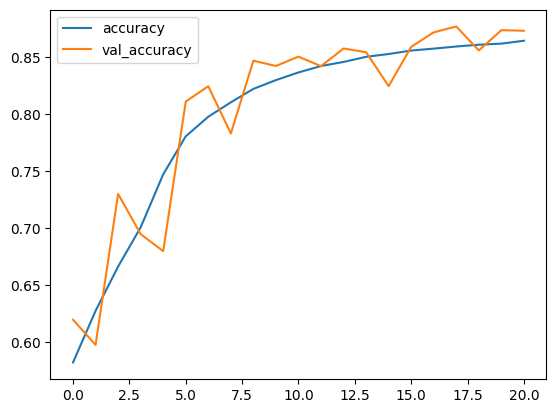

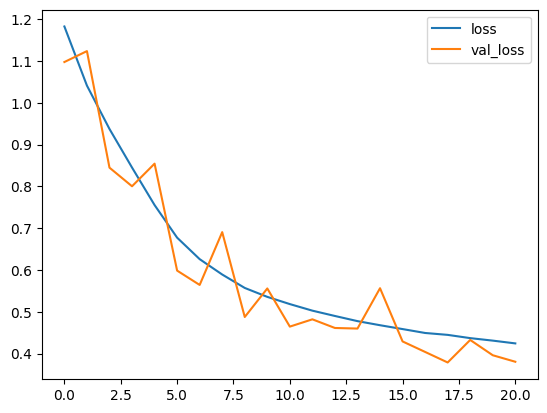

In [47]:
model_history = pd.DataFrame(history.history)
model_history.loc[:,['accuracy','val_accuracy']].plot()
model_history.loc[:,['loss','val_loss']].plot()

In [ ]:
model.evaluate(X_test,y_test)

1034/1034 [==============================] - 3s 3ms/step - loss: 0.3825 - accuracy: 0.8755


[0.3824550211429596, 0.8754913210868835]

In [ ]:
model.save('/content/drive/MyDrive/dataset/0.8755_lstm.keras')

In [50]:
history=model.fit(X_train,y_train,
            epochs=50,
            validation_data=(X_val,y_val),
            validation_freq=1,
            callbacks=[earlystopping])

Epoch 1/50
3308/3308 [==============================] - 22s 7ms/step - loss: 0.4364 - accuracy: 0.8606 - val_loss: 0.6579 - val_accuracy: 0.7911
Epoch 2/50
3308/3308 [==============================] - 21s 6ms/step - loss: 0.4301 - accuracy: 0.8628 - val_loss: 0.3770 - val_accuracy: 0.8759
Epoch 3/50
3308/3308 [==============================] - 22s 7ms/step - loss: 0.4245 - accuracy: 0.8635 - val_loss: 0.3770 - val_accuracy: 0.8723
Epoch 4/50
3308/3308 [==============================] - 21s 6ms/step - loss: 0.4179 - accuracy: 0.8653 - val_loss: 0.3688 - val_accuracy: 0.8787
Epoch 5/50
3308/3308 [==============================] - 24s 7ms/step - loss: 0.4145 - accuracy: 0.8663 - val_loss: 0.4839 - val_accuracy: 0.8401
Epoch 6/50
3308/3308 [==============================] - 21s 6ms/step - loss: 0.4098 - accuracy: 0.8676 - val_loss: 0.4410 - val_accuracy: 0.8512
Epoch 7/50
3308/3308 [==============================] - 22s 7ms/step - loss: 0.4030 - accuracy: 0.8693 - val_loss: 0.3914 - val_ac

<Axes: >

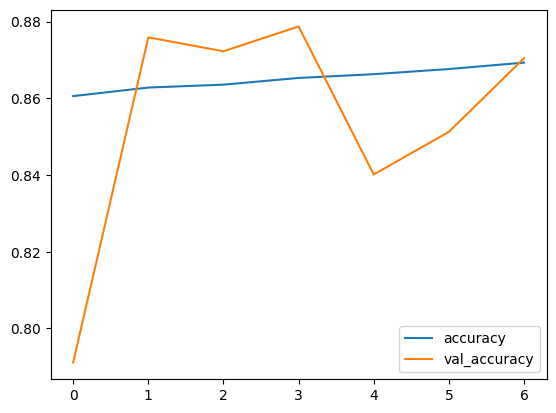

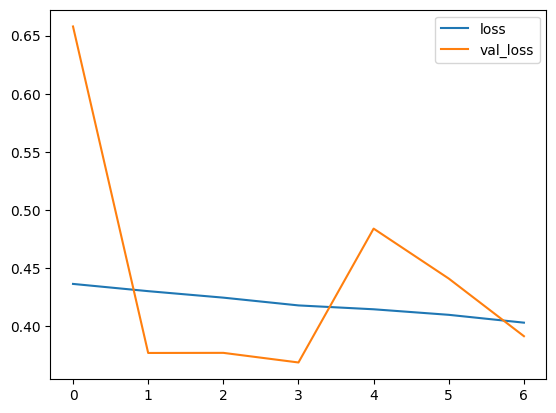

In [51]:
model_history = pd.DataFrame(history.history)
model_history.loc[:,['accuracy','val_accuracy']].plot()
model_history.loc[:,['loss','val_loss']].plot()

In [ ]:
model=create_cnn_lstm_model2((X_train.shape[1],X_train.shape[2]),5)
model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.optimizers.SGD(learning_rate=0.001),
                metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Bat  (None, 25, 1)             4         
 chNormalization)                                                
                                                                 
 conv1d_3 (Conv1D)           (None, 19, 64)            512       
                                                                 
 batch_normalization_5 (Bat  (None, 19, 64)            256       
 chNormalization)                                                
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 9, 64)             0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 9, 64)             0         
                                                      

In [ ]:
history=model.fit(X_train,y_train,
            epochs=30,
            validation_data=(X_val,y_val),
            validation_freq=1,
            callbacks=[earlystopping])

Epoch 1/30
3308/3308 [==============================] - 43s 11ms/step - loss: 1.6763 - accuracy: 0.3731 - val_loss: 1.1808 - val_accuracy: 0.5852
Epoch 2/30
3308/3308 [==============================] - 35s 10ms/step - loss: 1.3193 - accuracy: 0.5286 - val_loss: 1.1058 - val_accuracy: 0.5900
Epoch 3/30
3308/3308 [==============================] - 35s 11ms/step - loss: 1.1691 - accuracy: 0.5916 - val_loss: 1.1260 - val_accuracy: 0.6026
Epoch 4/30
3308/3308 [==============================] - 34s 10ms/step - loss: 1.0380 - accuracy: 0.6317 - val_loss: 0.9366 - val_accuracy: 0.6625
Epoch 5/30
3308/3308 [==============================] - 38s 11ms/step - loss: 0.9694 - accuracy: 0.6511 - val_loss: 0.8217 - val_accuracy: 0.7069
Epoch 6/30
3308/3308 [==============================] - 34s 10ms/step - loss: 0.9118 - accuracy: 0.6682 - val_loss: 0.8332 - val_accuracy: 0.7000
Epoch 7/30
3308/3308 [==============================] - 37s 11ms/step - loss: 0.8695 - accuracy: 0.6837 - val_loss: 0.7667 -

In [ ]:
history2=model.fit(X_train,y_train,
            epochs=30,
            validation_data=(X_val,y_val),
            validation_freq=1,
            callbacks=[earlystopping])

Epoch 1/30
3308/3308 [==============================] - 35s 11ms/step - loss: 0.6691 - accuracy: 0.7689 - val_loss: 0.6765 - val_accuracy: 0.7312
Epoch 2/30
3308/3308 [==============================] - 34s 10ms/step - loss: 0.6610 - accuracy: 0.7735 - val_loss: 0.6415 - val_accuracy: 0.7635
Epoch 3/30
3308/3308 [==============================] - 36s 11ms/step - loss: 0.6394 - accuracy: 0.7833 - val_loss: 0.5027 - val_accuracy: 0.8388
Epoch 4/30
3308/3308 [==============================] - 38s 11ms/step - loss: 0.6232 - accuracy: 0.7895 - val_loss: 0.6302 - val_accuracy: 0.7714
Epoch 5/30
3308/3308 [==============================] - 35s 11ms/step - loss: 0.6143 - accuracy: 0.7926 - val_loss: 0.8335 - val_accuracy: 0.7099
Epoch 6/30
3308/3308 [==============================] - 36s 11ms/step - loss: 0.6009 - accuracy: 0.7981 - val_loss: 0.4867 - val_accuracy: 0.8453
Epoch 7/30
3308/3308 [==============================] - 35s 10ms/step - loss: 0.5901 - accuracy: 0.8011 - val_loss: 0.5244 -

In [ ]:
model.evaluate(X_test,y_test)

1034/1034 [==============================] - 5s 4ms/step - loss: 0.4305 - accuracy: 0.8601


[0.43054041266441345, 0.8600713610649109]

In [ ]:
model.save('/content/drive/MyDrive/dataset/0.86_lstm2.keras')

In [ ]:
# model_history = pd.DataFrame(history.history)
model_history = pd.concat([pd.DataFrame(history.history),pd.DataFrame(history2.history)],ignore_index=True)
model_history

,loss,accuracy,val_loss,val_accuracy
0,1.676253,0.373116,1.180753,0.585207
1,1.319303,0.528644,1.105781,0.589969
2,1.169109,0.591555,1.126008,0.602593
3,1.037953,0.631722,0.936634,0.662497
4,0.969400,0.651101,0.821729,0.706867
5,0.911824,0.668156,0.833199,0.699951
6,0.869510,0.683671,0.766712,0.687101
7,0.837705,0.692582,0.848113,0.675687
8,0.814841,0.699753,0.775688,0.682641
9,0.793694,0.705980,0.736998,0.705809


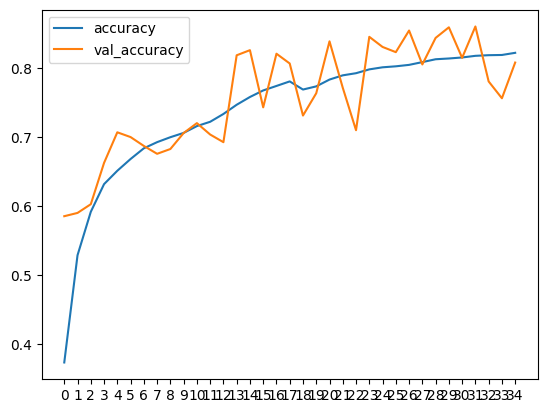

In [ ]:
model_history.loc[:,['accuracy','val_accuracy']].plot()
k=plt.xticks(model_history.index)

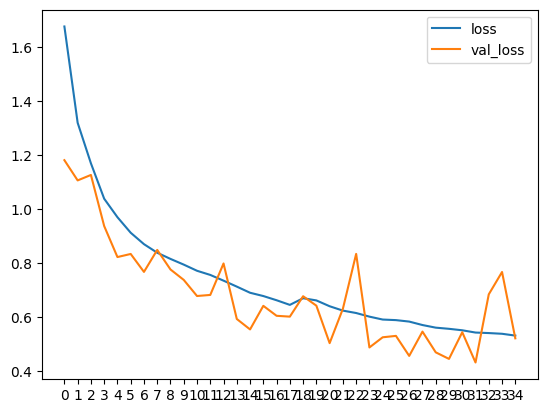

In [ ]:
model_history.loc[:,['loss','val_loss']].plot()
k=plt.xticks(model_history.index)

In [52]:
label=['benign', 'defacement', 'malware', 'phishing', 'spam']

In [54]:
input=['http://1337x.to/torrent/1048648/American-Sniper-2014-MD-iTALiAN-DVDSCR-X264-BST-MT/','https://www.youtube.com/?app=desktop','https://www.youtube.com/watch?v=EzNyPTVnblQ','https://www.kaggle.com/datasets/sid321axn/malicious-urls-dataset']

In [55]:
data=pd.DataFrame(columns=['url'])
data

,url


In [ ]:
for i in range(len(input)):
    data.loc[i,'url']=input[i]
data

,url
0,http://1337x.to/torrent/1048648/American-Snipe...
1,https://www.youtube.com/?app=desktop
2,https://www.youtube.com/watch?v=EzNyPTVnblQ
3,https://www.kaggle.com/datasets/sid321axn/mali...


In [88]:
link= ['https://www.youtube.com','https://www.youtube.com/watch?v=sd14-uIs5jQ','https://drive.google.com/drive/u/0/home','https://www.kaggle.com/code/fahaddalwai/detecting-malicious-url-using-neural-network','https://study4.com/tests/?term=ETS']
link=pd.DataFrame(link,columns=['url'])
link

,url
0,https://www.youtube.com
1,https://www.youtube.com/watch?v=sd14-uIs5jQ
2,https://drive.google.com/drive/u/0/home
3,https://www.kaggle.com/code/fahaddalwai/detect...
4,https://study4.com/tests/?term=ETS


In [ ]:
# model=keras.models.load_model('/content/drive/MyDrive/dataset/0.8733_lstm.keras')
# model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout (Dropout)           (None, 100)              

In [58]:
model_test=keras.models.load_model('/content/drive/MyDrive/dataset/0.8755_lstm.keras')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 100)               91600     
                                                                 
 dropout (Dropout)           (None, 100)              

In [66]:
def get_domain(url):
    try:
        res=get_tld(url,as_object=True,fail_silently=False,fix_protocol=True)
        pri_domain=res.parsed_url.netloc
    except:
        pri_domain=None
    return pri_domain
def abnormal_url(url):
    hostname=urlparse(url).hostname
    hostname=str(hostname)
    match=re.search(hostname,url)
    if match:
        return 1
    else:
        return 0
def http_secure(url):
    http=urlparse(url).scheme
    match=str(http)
    if match=='https':
        return 1
    else:
        return 0
def digit_count(url):
    digits=0
    for c in url:
        if c.isnumeric():
            digits+=1
    return digits
def letter_count(url):
    letters=0
    for c in url:
        if c.isalpha():
            letters+=1
    return letters
def find_shortening_service(url):
    match=re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net', url)
    if match:
        return 1
    else:
        return 0
def contain_ip_address(url):
    match=re.search('(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)
    if match:
        return 1
    else:
        return 0


In [60]:
import re

In [89]:
data=link

In [90]:
data['url_len']=data['url'].apply(lambda x: len(str(x)))
data['domain']=data['url'].apply(lambda x: get_domain(x))
chars=['@','?','-','=','.','#','%','+','$','!','*',',','//']
for char in chars:
    data[char]=data['url'].apply(lambda x: x.count(char))
data['abnormal_url']=data['url'].apply(lambda x: abnormal_url(x))
data['https']=data['url'].apply(lambda x: http_secure(x))
data['digits']=data['url'].apply(lambda x: digit_count(x))
data['letters']=data['url'].apply(lambda x: letter_count(x))
data['shortening_service']=data['url'].apply(lambda x: find_shortening_service(x))
data['contain_ip_address']=data['url'].apply(lambda x: contain_ip_address(x))
data

,url,url_len,domain,@,?,-,=,.,#,%,...,!,*,",",//,abnormal_url,https,digits,letters,shortening_service,contain_ip_address
0,https://www.youtube.com,23,www.youtube.com,0,0,0,0,2,0,0,...,0,0,0,1,1,1,0,18,0,0
1,https://www.youtube.com/watch?v=sd14-uIs5jQ,43,www.youtube.com,0,1,1,1,2,0,0,...,0,0,0,1,1,1,3,31,0,0
2,https://drive.google.com/drive/u/0/home,39,drive.google.com,0,0,0,0,2,0,0,...,0,0,0,1,1,1,1,29,0,0
3,https://www.kaggle.com/code/fahaddalwai/detect...,84,www.kaggle.com,0,0,5,0,2,0,0,...,0,0,0,1,1,1,0,71,0,0
4,https://study4.com/tests/?term=ETS,34,study4.com,0,1,0,1,1,0,0,...,0,0,0,1,1,1,1,25,0,0


In [91]:
data['protocol_url']=data['url'].apply(lambda x: protocol(x))
data['sub_domain_url']=data['url'].apply(lambda x: sub_domain(x))
data['domain_url']=data['url'].apply(lambda x: domain(x))
data['suffix_domain_url']=data['url'].apply(lambda x: suffix(x))
data['path_url']=data['url'].apply(lambda x: path(x))
data.head(1)

,url,url_len,domain,@,?,-,=,.,#,%,...,https,digits,letters,shortening_service,contain_ip_address,protocol_url,sub_domain_url,domain_url,suffix_domain_url,path_url
0,https://www.youtube.com,23,www.youtube.com,0,0,0,0,2,0,0,...,1,0,18,0,0,https,www,youtube,com,


load model trích xuất vector đặc trưng

In [70]:
model=keras.models.load_model('/content/drive/MyDrive/dataset/feature_character.keras')

In [92]:
feature=get_feature(data['protocol_url'])
feature=np.average(feature,axis=1)
data['protocol_url']=feature
feature=get_feature(data['sub_domain_url'])
feature=np.average(feature,axis=1)
data['sub_domain_url']=feature
feature=get_feature(data['domain_url'])
feature=np.average(feature,axis=1)
data['domain_url']=feature
feature=get_feature(data['suffix_domain_url'])
feature=np.average(feature,axis=1)
data['suffix_domain_url']=feature
feature=get_feature(data['path_url'])
feature=np.average(feature,axis=1)
data['path_url']=feature

1/1 [==============================] - 0s 16ms/step


In [93]:
data.head(2)

,url,url_len,domain,@,?,-,=,.,#,%,...,https,digits,letters,shortening_service,contain_ip_address,protocol_url,sub_domain_url,domain_url,suffix_domain_url,path_url
0,https://www.youtube.com,23,www.youtube.com,0,0,0,0,2,0,0,...,1,0,18,0,0,-0.000174,-0.000273,-0.000222,-0.000247,-0.00023
1,https://www.youtube.com/watch?v=sd14-uIs5jQ,43,www.youtube.com,0,1,1,1,2,0,0,...,1,3,31,0,0,-0.000174,-0.000273,-0.000222,-0.000247,-0.00024


In [94]:
data=data.drop(columns=['url','domain'],axis=1)
data.shape

(5, 25)

In [95]:
data= pipeline.transform(data)

In [96]:
y_pred=np.argmax(model_test.predict(data),axis=1)
y_pred

1/1 [==============================] - 0s 95ms/step


array([3, 2, 2, 0, 0])

In [97]:
for x in y_pred:
    print(label[x])

phishing
malware
malware
benign
benign
